In [2]:
%matplotlib inline
%load_ext rmagic
# %load_ext rpy2.ipython
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit

from IPython.display import display
from IPython.display import HTML

print 'import finished'

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic
import finished


# Week1 Homework

### Exercise 1

In [3]:
myopia = pd.read_csv('./data/MYOPIA-fixed.csv')
display(myopia.head(5))
# print 'myopic 0', len(table[table['MYOPIC'] == 0])
# print 'myopic 1', len(table[table['MYOPIC'] == 1])
# print table.columns
# print table[['MYOPIC', 'SPHEQ']]

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


#### Exercise 1a
- replace x with SPHEQ
- **logistic regression model** : $\pi(x) = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$, 
$1 - \pi(x) = \frac{1}{1 + e^{\beta_0 + \beta_1x}}$

- **logit transformation** : $g(x) = ln(\frac{\pi(x)} {1-\pi(x)}) = ln(e^{\beta_0 + \beta_1x}) = \beta_0 + \beta_1x$

- the values of outcome variable (MYOPIC) are binary which is discrete and not continuous, thus logistic model is more suitable than linear regression model.

#### Exercise 1b

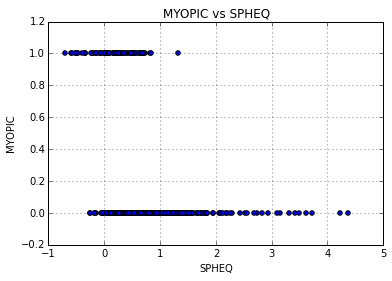

In [7]:
sub = plt.subplot()
sub.scatter(x=myopia['SPHEQ'], y=myopia['MYOPIC'])
sub.set_xlabel('SPHEQ')
sub.set_ylabel('MYOPIC')
sub.set_title('MYOPIC vs SPHEQ')
sub.grid(True)
plt.show()

#### Exercise 1c
likelihood / log-likelihood function, n=618, (y=1 for 81, y=0 for 537)

- **likelihood function** : $\xi(x_i) = \Pi_{i=1}^n \xi(x_i) = \Pi_{i=1}^n \pi(x_i)^{y_i}[1-\pi(x_i)]^{1-y_i}]$

- **log likelihood function** : $ln(\xi(x_i)) = \sum_{i=1}^n [ y_i ln(\pi(x_i)) + (1-y_i) ln(1-\pi(x_i))] $

#### Exercise 1d
- **logit estimation**: $\pi(x) = \frac{e^{0.054 - 3.8331x}} {1 + e^{0.054 - 3.8331x}}$
- **logit estimation log**: $lg(\pi(x)) = 0.054\beta_0 - 3.8331\beta_1x$

Optimization terminated successfully.
         Current function value: 0.272933
         Iterations 8


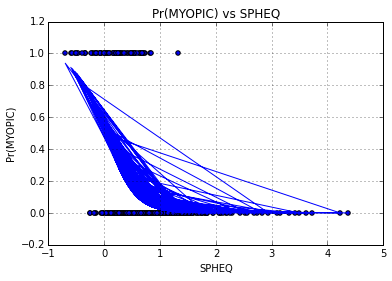

In [8]:
lg = logit(formula = 'MYOPIC ~ SPHEQ', data=myopia)
result = lg.fit()
# print result.summary()
intercept, SPHEQ = result.params['Intercept'], result.params['SPHEQ']

numerator = np.exp(intercept + SPHEQ * myopia.SPHEQ)
sub = plt.subplot()
sub.plot(myopia.SPHEQ, numerator / (1 + numerator))
sub.scatter(x=myopia['SPHEQ'], y=myopia['MYOPIC'])
sub.set_xlabel('SPHEQ')
sub.set_ylabel('Pr(MYOPIC)')
sub.set_title('Pr(MYOPIC) vs SPHEQ')
sub.grid(True)
plt.show()

### Exercise 2

In [9]:
icu = pd.read_csv('./data/icu.csv')
icu.head()
print len(icu[icu.STA == 1])
print len(icu[icu.STA == 0])

40
160


#### Exercise 2a
- x -> AGE
- **logistic regression model** : $\pi(x) = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$, 
$1 - \pi(x) = \frac{1}{1 + e^{\beta_0 + \beta_1x}}$

- **logit transformation** : $g(x) = ln(\frac{\pi(x)} {1-\pi(x)}) = ln(e^{\beta_0 + \beta_1x}) = \beta_0 + \beta_1x$

- the values of outcome variable (STA) are binary which is discrete and not continuous, thus logistic model is more suitable than linear regression model.

#### Exercise 2b

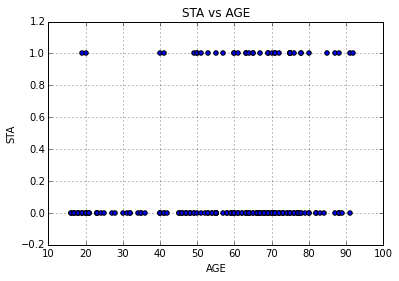

In [10]:
sub = plt.subplot()
sub.scatter(x=icu.AGE, y=icu.STA)
sub.set_xlabel('AGE')
sub.set_ylabel('STA')
sub.set_title('STA vs AGE')
sub.grid(True)
plt.show()

#### Exercise 2c
likelihood / log-likelihood function, n=160, (y=1 for 40, y=0 for 120)

- **likelihood function** : $\xi(x_i) = \Pi_{i=1}^n \xi(x_i) = \Pi_{i=1}^n \pi(x_i)^{y_i}[1-\pi(x_i)]^{1-y_i}]$

- **log likelihood function** : $ln(\xi(x_i)) = \sum_{i=1}^n [ y_i ln(\pi(x_i)) + (1-y_i) ln(1-\pi(x_i))] $

#### Exercise 2d
- **logit estimation**: $\pi(x) = \frac{e^{-3.0585 + 0.0275x}} {1 + e^{-3.0585 + 0.0275x}}$
- **logit estimation log**: $lg(\pi(x)) = -3.0585\beta_0 + 0.0275\beta_1x$

Optimization terminated successfully.
         Current function value: 0.480766
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.03924
Time:                        22:24:07   Log-Likelihood:                -96.153
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                  0.005069
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.0585      0.696     -4.394      0.000        -4.423    -1.694
AGE            0.0275      0.

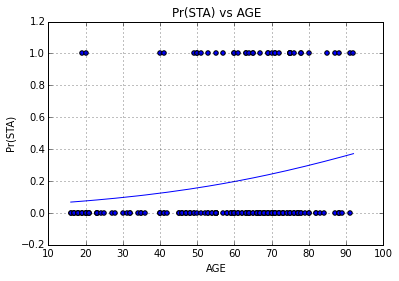

In [11]:
iculg = logit(formula = 'STA ~ AGE', data=icu)
result = iculg.fit()
print result.summary()
intercept, AGE = result.params['Intercept'], result.params['AGE']

numerator = np.exp(intercept + AGE * icu.AGE)
sub = plt.subplot()
sub.plot(icu.AGE, numerator / (1 + numerator))
sub.scatter(x=icu.AGE, y=icu.STA)
sub.set_xlabel('AGE')
sub.set_ylabel('Pr(STA)')
sub.set_title('Pr(STA) vs AGE')
sub.grid(True)
plt.show()

#### Exercise 2e
Summary: from the initial scatter plot, STA seemed only vaguely positively correated with AGE, but after logistic estimation, it was easy to notice that the probability of STA increased with AGE.

#Week2
the comparison of `observed` to `predicted` values using the likelihood function 
- **likelihood ratio** : $[\frac{model\>likelihood} {saturated\>model\>likelihood}]$

- **likelihood ratio test** : $ -2ln\, [ likelihood\>ratio ] $

to assess the significance of an independent variable, compare the value D with/without the independent variable.
- ** G = D(model without variable) - D(model with the variable) ** = $-2ln\,[\frac{likelihood\>without\>variable} {likelihood\> with\>variable}]$

- Under $H_0 : \beta_1 = 0$, the statistics G ~ $\chi^2(1)$ (distributed with $\chi^2$ degree of freedom 1)

- Wald Test(W) = $\frac{ \hat{\beta_1} }  { \widehat{SE}(\hat{\beta_1}) }$, and under $H_0 : \beta_1 = 0$, W ~ $N(0,1)$

- prefer Likelihood ratio test to Wald Test.

### Exercise 1

In [12]:
myopia2 = pd.read_csv('./data/MYOPIA-fixed.csv') # re-read the table
lg2 = logit(formula = 'MYOPIC ~ SPHEQ', data=myopia2)
mresult2 = lg2.fit()
mresult2.summary()

Optimization terminated successfully.
         Current function value: 0.272933
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 MYOPIC   No. Observations:                  618
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.2973
Time:                        22:24:17   Log-Likelihood:                -168.67
converged:                       True   LL-Null:                       -240.04
                                        LLR p-value:                 6.727e-33
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0540      0.207      0.261      0.794        -0.351     0.459
SPHEQ         -3.8331      0.418     -9.162      0.000        -4.653    -3.013
==============================================================================
"""

Using the results of the output from Stata, assess the significance of the slope coefficient for SPHEQ using the likelihood ratio test and the Wald test. What assumptions are needed for the p-values computed for each of these tests to be valid? Are the results of these tests consistent with one another? What is the value of the deviance for the fitted model?

Test: $H_0 : \beta_1 = 0$, $H_a: \beta_1 \neq 0$

- Likelihood ratio test assumption: result G is distributed as $\chi^2$ with df=1
- Likelihood ratio test(G) = 142.7331 with 1 df(p-value) < 0.001
    1. G = -2 * (-240.04) + 2 * (-168.67) = 142.7331
- Wald test assumption: W is distributed as N(0,1)
- Wald test = -9.162 with p-value < 0.001
- Both test results indicates that SPHEQ is a significant variable in predicting MYOPIA.

In [311]:
print result2.llf, result2.llnull, result2.llr, result2.llr_pvalue
print -3.8331 / 0.418

-168.672439854 -240.038508429 142.732137151 6.72664045685e-33
-9.17009569378


### Exercise 2

In [13]:
icu = pd.read_csv('./data/icu.csv')
iculg2 = logit(formula = 'STA ~ AGE', data=icu)
icuresult = iculg2.fit()
icuresult.summary()

Optimization terminated successfully.
         Current function value: 0.480766
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.03924
Time:                        22:24:26   Log-Likelihood:                -96.153
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                  0.005069
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.0585      0.696     -4.394      0.000        -4.423    -1.694
AGE            0.0275      0.011      2.607      0.009         0.007     0.048
==============================================================================
"""

Using the results of the output from the logistic regression package used for problem 2 part (d) of week 1, assess the significance of the slope coefficient for AGE using the likelihood ratio test and the Wald test. What assumptions are needed for the p-values computed for each of these tests to be valid? Are the results of these tests consistent with one another? What is the value of the deviance for the fitted model?

Test: $H_0 : \beta_1 = 0$, $H_a: \beta_1 \neq 0$
- Likelihood ratio test assumption: statistic G is distributed as $\chi^2$ with df=1
- Likelihood ratio test(G) = 7.8546 with 1 df(p-value) < 0.05
    1. G = -2 * (-100.08) + 2 * (-96.153) = 7.8546
- Wald test assumption: W is distributed as N(0,1)
- Wald test = -2.607 with p-value < 0.05
- Both test results indicates that AGE is a significant variable in predicting STA. Thus reject $H_0$

In [14]:
# print icuresult.llf, icuresult.llnull, icuresult.llr, icuresult.llr_pvalue
print 'log likelihood with variable: %s' % icuresult.llf
print 'log likelihood without variable: %s' % icuresult.llnull
print 'log likelihood ratio(Deviance): %s' % icuresult.llr
print 'log likelihood ratio p-value: %s' %icuresult.llr_pvalue
print -2*icuresult.llf +2*icuresult.llnull

log likelihood with variable: -96.1531901919
log likelihood without variable: -100.080484708
log likelihood ratio(Deviance): 7.85458903155
log likelihood ratio p-value: 0.00506918737428
-7.85458903155


# Week 3 - 4
Confidence interval estimator of coefficient is $\hat{\beta_j} \pm z_{1-a/2} \widehat{SE}(\hat{\beta_j})$,
where $\widehat{SE}(\hat{\beta_j}) = \sqrt{\widehat{Var}(\hat{\beta_j})} $

Confidence interval for the logit for a single subject:

- the estimated logit : $\hat{g}(x) = ln(\frac{\pi(x)} {1-\pi(x)}) = \sum_{j=0}^p \hat{\beta_j}x_j$

- the estimate of it's variable : $\widehat{Var}(\hat{g}(x)) =  x'[\widehat{Var}(\hat{\beta})]x$

- confidence interval of logit: $\hat{g}(x) \pm z_{1-a/2} \widehat{SE}(\hat{g}(x)) $

- confidence interval of estimated logistic probability: 
    $\frac{e^{\hat{g}(x) \pm z_{1-a/2} \widehat{SE}(\hat{g}(x))}} 
       {1 + e^{\hat{g}(x) \pm z_{1-a/2} \widehat{SE}(\hat{g}(x))}}$

`link function` - function of y that yields linear function of independent variable, linearlity allows the coefficient $\beta_1$ to indicate the change in dependent variable(y) corresponding to a unit change in the independent variable(x). In other words, **logit transformation** of y is linear to x.

- logistic regression's link function: $ln(\frac{\pi(x)} {1-\pi(x)}) = ln(e^{\beta_0 + \beta_1x}) = \beta_0 + \beta_1x$
- **$\Delta$ in logit for 1 unit $\Delta$ in x.** : $g(x+1) - g(x)= (\beta_0 + \beta_1x + \beta_1) - (\beta_0 + \beta_1x) = \beta_1$


- interpretation of $\beta_1$ depends on difference between above 2 logit and nature of independent variable x. (dichotomous, polychotomous, continuous, etc..)
    - Pr(y=1|x) = $\pi(x) = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$, Pr(y=0|x) =
$1 - \pi(x) = \frac{1}{1 + e^{\beta_0 + \beta_1x}}$
    - Dichotomous case: x is coded as 0, 1
        - consider cases of y=0,1 and x=0,1
        - the odds of outcome being present among exposed individuals(x=1):
            - $\frac{Pr(y=1|x=1)} {Pr(y=0|x=1)} = \frac{\pi(1)} {1-\pi(1)}$
            
        - for those not exposed individuals(x=0):
            - $\frac{Pr(y=1|x=0)} {Pr(y=0|x=0)} = \frac{\pi(0)} {1-\pi(0)}$
            
        - the `odds ratio, log odds ratio(logit difference)` is the ratio of odds (x=1) to odds (x=0)
            - OR = $\frac { \pi(1) \> / \> 1-\pi(1) } { \pi(0) \> / \> 1-\pi(0) } = e^{\beta_1}, \> ln(OR) = \beta_1$
            - Odds ratio is the odds the outcome **occurs** given **exposure** vs **non-exposure**.
            - [Difference between Odds Ratio and Likelihood Ratio](https://www.quora.com/How-can-I-remember-the-differences-between-odds-ratio-hazard-ratio-and-likelihood-ratio-and-in-what-instances-they-should-be-applied)
            - [More on odds ratio](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm)
        - confidene interval estimation:
            - $ln(OR)$ is moren normally distributed than OR, thus is which confidence interval is based on.
            - $\widehat{Var}(\hat{\beta_1}) =  [\frac{1} {a} + \frac{1} {b} + \frac{1} {c} + \frac{1} {d} ]$
            - $\widehat{SE}(\hat{\beta_1}) = \sqrt{\widehat{Var}(\hat{\beta_1})} $, $\hat{\beta_1} \pm z_{1-a/2} \widehat{SE}(\hat{\beta_1})$
                        
    - Polychotomous case: a variable has 3 or more levels with a fixed number of outcomes
        - Referent Group: Primary comparison group when generating odds ratios in logistic regression. It is often the group with the lowest risk/odds of outcome
        - Referent Cell Coding: All design variables are coded as 0 for the referent group


### Exercise 1

In [15]:
myopia2 = pd.read_csv('./data/MYOPIA-fixed.csv')
lg2 = logit(formula = 'MYOPIC ~ SPHEQ', data=myopia2)
mresult2 = lg2.fit()
mresult2.summary()

Optimization terminated successfully.
         Current function value: 0.272933
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 MYOPIC   No. Observations:                  618
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.2973
Time:                        22:24:37   Log-Likelihood:                -168.67
converged:                       True   LL-Null:                       -240.04
                                        LLR p-value:                 6.727e-33
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0540      0.207      0.261      0.794        -0.351     0.459
SPHEQ         -3.8331      0.418     -9.162      0.000        -4.653    -3.013
==============================================================================
"""

#### exercise 1a
95% confidence that the actual SPHEQ coefficient lies between -4.653 and -3.013.
- $\hat{\beta_{SPHEQ}} \pm z_{1-a/2} \widehat{SE}(\hat{\beta_{SPHEQ}}) = -3.8331 \pm 1.96(0.418)$

#### exercise 1b
With SPHEQ = 2
- $\hat{g}(x) = \beta_0 + \beta_1x = 0.054 - 3.8331 * 2 = -7.6122$

Covariance Matrix(intercept, SPHEQ):
$\begin{bmatrix} 0.0427 & -0.0634 \\ -0.0634 & 0.1751 \end{bmatrix}$

$ \widehat{Var}(\hat{g}(x)) = x' [\widehat{Var}(\hat{\beta})] x = \begin{bmatrix} 1 & 2 \end{bmatrix} \begin{bmatrix} 0.0427 & -0.0634 \\ -0.0634 & 0.1751 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix} = 0.4894, 
\widehat{SE}(\hat{\beta}) = 0.6996$

Logit 95% confidece interval:
- $\hat{g}(x) \pm z_{1-a/2} \widehat{SE}(\hat{g}(x)) = -7.6122 \pm 1.96(0.6996) \to [-8.9834, -6.2410]$

Estimated logistic probability:
- $\frac {e^{-7.6122}} {1 + e^{-7.6122}} = 0.00049414$

95% confidence interval for estimated logistic probability:
- $[ \frac {e^{-8.9834}} {1 + e^{-8.9834}}, \frac {e^{-6.2410}} {1 + e^{-6.2410}} ] = [0.0001254, 0.001944]$

The probability of having MYOPIA given SPHEQ=2 is 0.0494% with 95% confidence interval [0.01254%, 0.1944%]

### Exercise 2

In [16]:
icu = pd.read_csv('./data/icu.csv')
iculg2 = logit(formula = 'STA ~ AGE', data=icu)
icuresult = iculg2.fit()
icuresult.summary()

Optimization terminated successfully.
         Current function value: 0.480766
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.03924
Time:                        22:24:45   Log-Likelihood:                -96.153
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                  0.005069
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.0585      0.696     -4.394      0.000        -4.423    -1.694
AGE            0.0275      0.011      2.607      0.009         0.007     0.048
==============================================================================
"""

#### exercise 2a
95% confidence that the actual AGE coefficient lies between 0.007 and 0.048.
- $\hat{\beta_{AGE}} \pm z_{1-a/2} \widehat{SE}(\hat{\beta_{AGE}}) = 0.0275 \pm 1.96(0.011)$

#### exercise 2b

With AGE = 60
- $\hat{g}(x) = \beta_0 + \beta_1x = -3.0585 + 0.0275 * 60 = -1.4085$

Covariance Matrix(intercept, AGE):
$\begin{bmatrix} 0.4846 & -0.007104 \\ -0.007104 & 0.000112 \end{bmatrix}$

$ \widehat{Var}(\hat{g}(x)) = x' [\widehat{Var}(\hat{\beta})] x = \begin{bmatrix} 1 & 60 \end{bmatrix} \begin{bmatrix} 0.4846 & -0.007104 \\ -0.007104 & 0.000112 \end{bmatrix} \begin{bmatrix} 1 \\ 60 \end{bmatrix} = 0.03394, 
\widehat{SE}(\hat{\beta}) = 0.1842$

Logit 95% confidece interval:
- $\hat{g}(x) \pm z_{1-a/2} \widehat{SE}(\hat{g}(x)) = -1.4085 \pm 1.96(0.1842) \to [-1.7695, -1.0475]$

Estimated logistic probability:
- $\frac {e^{-1.4085}} {1 + e^{-1.4085}} = 0.1965$

95% confidence interval for estimated logistic probability:
- $[ \frac {e^{-1.7695}} {1 + e^{-1.7695}}, \frac {e^{-1.0475}} {1 + e^{-1.0475}} ] = [0.1456, 0.2597]$

The probability of having STA given AGE=60 is 19.65% with 95% confidence interval [14.56%, 25.97%]

In [17]:
covm = icuresult.cov_params()
print covm
print math.exp(-1.4085) / (1+math.exp(-1.4085))
print math.exp(-1.7695) / (1+math.exp(-1.7695))
print math.exp(-1.0475) / (1+math.exp(-1.0475))
var = np.array([1,60]).T.dot(icuresult.cov_params()).dot(np.array([1,60]))
print var, math.sqrt(var)

           Intercept       AGE
Intercept   0.484586 -0.007104
AGE        -0.007104  0.000112
0.196470753549
0.145604519837
0.259705458333
0.0339372225345 0.184220581192


### Exercise 3

In [19]:
icu = pd.read_csv('./data/icu.csv')
icu['RACE2'] = (icu['RACE'] == 2).astype(int)
icu['RACE3'] = (icu['RACE'] == 3).astype(int)
# iculg = logit(formula = 'STA ~ AGE + CAN + CPR + INF + RACE2 + RACE3', data=icu)
# icuresult = iculg.fit()
# display(icuresult.summary())
# CALLING LOGITSTIC REGRESSION THROUGH R BECAUSE FOR SOME REASON STATSMODEL'S LOGIT DOESN'T TAKE INF PARAM.
%R -i icu print(summary(glm(STA ~ AGE + CAN + CPR + INF + RACE2 + RACE3, data=icu, family=binomial())))

ERROR: Line magic function `%R` not found.


#### exercise 3a

Coding Design Variable for RACE(1 2 3), need 2 dummy variables to represent 3 RACE groups.

RACE | Label | Race2 | Race3
-|-|:-:|:-:
1 | White | 0 | 0
2 | Black | 1 | 0
3 | Other | 0 | 1


#### exercise 3b

Logistic regression model of STA on AGE, CAN, CPR, INF, and RACE
- **logistic regression model** : $\pi(x) = \frac{e^{\beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}}} {1 + e^{\beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}}}$, 
$1 - \pi(x) = \frac{1}{1 + e^{\beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}}}$
- **logit transformation** : $g(x) = ln(\frac{\pi(x)} {1-\pi(x)}) = ln(e^{\beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}}) = \beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}$

#### exercise 3c

- **likelihood function** : $\xi(x_i) = \Pi_{i=1}^n \xi(x_i) = \Pi_{i=1}^n \pi(x_i)^{y_i}[1-\pi(x_i)]^{1-y_i}]$
    - Xs = {AGE, CAN, CPR, INF, RACE1, RACE2}, 6 variables and 7 different likelihood equations. (y=1 for STA, y=0 for not)

- **log likelihood function** : $ln(\xi(x_i)) = \sum_{i=1}^n [ y_i ln(\pi(x_i)) + (1-y_i) ln(1-\pi(x_i))] $

#### exercise 3d

- **logistic regression model** : $\pi(x) = \frac{e^{-3.51152 + 0.02712*{AGE} + 0.24451*{CAN} + 1.64650*{CPR} + 0.68067*{INF} -0.95708*{RACE2} + 0.25975*{RACE3}}} {1 + e^{-3.51152 + 0.02712*{AGE} + 0.24451*{CAN} + 1.64650*{CPR} + 0.68067*{INF} -0.95708*{RACE2} + 0.25975*{RACE3}}}$
- **logit transformation** : $g(x) = -3.51152 + 0.02712*{AGE} + 0.24451*{CAN} + 1.64650*{CPR} + 0.68067*{INF} -0.95708*{RACE2} + 0.25975*{RACE3}$

### Exercise 4

In [20]:
hypo = pd.read_csv('./data/hyponatremia.csv')
hypolg = logit(formula='nas135 ~ female', data=hypo)
hresult = hypolg.fit()
display(hresult.summary())
runlg = logit(formula='nas135 ~ runtime', data=hypo)
display(runlg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.360585
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  488
Model:                          Logit   Df Residuals:                      486
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.05293
Time:                        22:25:04   Log-Likelihood:                -175.97
converged:                       True   LL-Null:                       -185.80
                                        LLR p-value:                 9.204e-06
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.4749      0.208    -11.884      0.000        -2.883    -2.067
female         1.2260      0.280      4.386      0.000         0.678     1.774
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.351723
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      475
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.07025
Time:                        22:25:04   Log-Likelihood:                -167.77
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 4.777e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5926      0.771     -7.251      0.000        -7.104    -4.081
runtime        0.0155      0.003      5.015      0.000         0.009     0.022
==============================================================================
"""

#### exercise 4a

$\beta_0 = -2.4749, \beta_{female} = 1.2260, \> e^{1.2260} = 3.41 \Rightarrow$ 
   - the (odds/log odds) of nas135 is (3.41%/1.22) times for female of that of male.

#### exercise 4b

$\beta_{runtime} = 0.0155, \> e^{0.0155} = 1.0156 \Rightarrow$ 
   - the (odds/log odds) of nas135 increases by (1.0156%/0.0155) for every unit increase of runtime. 
   
#### exercise 4c
   - the `odds ratio` is the ratio of odds (nas135 y=1,0 | runtime x=1) to odds (nas135 y=1,0 | runtime x=0) (or odd increase of dependent for every unit increase of independent)
       - OR = $\frac { \pi(1) \> / \> 1-\pi(1) } { \pi(0) \> / \> 1-\pi(0) } = e^{\beta_1} = e^{0.0155} = 1.0156 \>$
       - For every increase in runtime, the odds of nas136 increases by 1.0156%.
    
#### exercise 4d
   - the -5.5926 is the log odds of nas136 of runner finishing marathon with 0 minute. This is impossible. The btter way would be to normalize runtime around it's average so the defualt intercept will correspond to runner of average finishing time.

#### exercise 4e
Odds ratio for runtime difference of 2 hours(120 minutes).
   - OR = $e^{0.0155*120} = 6.42$
   - 95% confidece interval: $[e^{0.009*120}, e^{0.022*120}] = [2.94, 14.01]$

In [21]:
hyporf = logit(formula='nas135 ~ female + runtime', data=hypo)
display(hyporf.fit().summary())

Optimization terminated successfully.
         Current function value: 0.340125
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      474
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1009
Time:                        22:25:08   Log-Likelihood:                -162.24
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 1.237e-08
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.7211      0.823     -6.949      0.000        -7.335    -4.107
female         0.9638      0.291      3.312      0.001         0.393     1.534
runtime        0.0142      0.003      4.314      0.000         0.008     0.021
==============================================================================
"""

#### exercise 4f
   - $\beta_{female} = 0.9638, \beta_{runtime} = 0.0142$
   - Log odds of nas135 for female runner is 0.9638 times that of male's.
   - Log odds of nas135 increases by 0.0142 for every minute increase of runtime.
   
#### exercise 4g
   - Compared to coefficient of the female only model, $\beta_{female}$ decreases by 21.39% (1.2260 to 0.9638)
   
#### exercise 4h
   - Odds ratio of hyponatremia for female vs male: $e^{\beta_1} = e^{0.9638} = 2.62 \>$

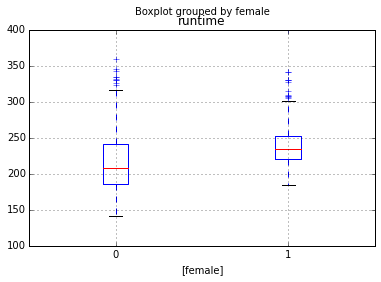

In [22]:
subdf = pd.DataFrame(columns=['runtime','female'])
subdf['runtime'] = hypo.runtime
subdf['female'] = hypo.female
subdf.boxplot(by='female')

#### exercise 4i
   - there is a positive association between `female` and `runtime` factor since `female` coefficient decreased upon introduction of `runtime` factor. Also becasue `female` coefficient changed(decreased) by almost 21%, and `runtime` also having positive relationship with `nas135`, we can conclude that `runtime` is a confounding factor here.

In [24]:
### exercise 4i
hypo = pd.read_csv('./data/hyponatremia.csv')
ilg = logit(formula='nas135 ~ female*runtime', data=hypo)
iresult = ilg.fit()
display(iresult.summary())

Optimization terminated successfully.
         Current function value: 0.339935
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      473
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1014
Time:                        22:25:19   Log-Likelihood:                -162.15
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 5.597e-08
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -6.0067      1.068     -5.626      0.000        -8.099    -3.914
female             1.6644      1.666      0.999      0.318        -1.601     4.930
runtime            0.0154      0.004      3.581      0.000         0.007     0.024
female:runtime    -0.0028      0.007     -0.427      0.669        -0.016     0.010
==================================================================================
"""

#### exercise 4j: assess interaction between `female` and `runtime`
   - interaction `female vs runtime` of -0.0028 has p-value of non-significant 0.669 > (0.05 95%), thus no interactions.

In [25]:
### exercise 4j
hypo = pd.read_csv('./data/hyponatremia.csv')
ilg = logit(formula='nas135 ~ female*runtime', data=hypo)
iresult = ilg.fit()
display(iresult.summary())

Optimization terminated successfully.
         Current function value: 0.339935
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      473
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1014
Time:                        22:25:26   Log-Likelihood:                -162.15
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 5.597e-08
==================================================================================
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -6.0067      1.068     -5.626      0.000        -8.099    -3.914
female             1.6644      1.666      0.999      0.318        -1.601     4.930
runtime            0.0154      0.004      3.581      0.000         0.007     0.024
female:runtime    -0.0028      0.007     -0.427      0.669        -0.016     0.010
==================================================================================
"""

#### exercise 4k: introduce variable `wtidiff(1 or 0)` to the model.
   - interaction of `female` vs `wgain` of -1.0959 has p-value of 0.074, this could be deemed either way depending on the confidence interval. (0.074 > 0.1 90% confidence interval thus significant)

In [26]:
### exercise 4j
hypo = pd.read_csv('./data/hyponatremia.csv')
hypo['wgain'] = hypo['wtdiff'].map(lambda x: 0 if x <= 0 or np.isnan(x) else 1)
klg = logit(formula='nas135 ~ female*wgain + runtime', data=hypo)
kresult = klg.fit()
display(kresult.summary())

Optimization terminated successfully.
         Current function value: 0.308133
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      472
Method:                           MLE   Df Model:                            4
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1855
Time:                        22:25:33   Log-Likelihood:                -146.98
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 1.005e-13
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -6.7655      0.964     -7.020      0.000        -8.654    -4.877
female           1.4143      0.465      3.039      0.002         0.502     2.326
wgain            2.1553      0.464      4.648      0.000         1.246     3.064
female:wgain    -1.0959      0.614     -1.785      0.074        -2.299     0.107
runtime          0.0147      0.004      4.066      0.000         0.008     0.022
================================================================================
"""

#### exercise 4l: odds ratio of `nas135` on `wgain` for male / female.
   - **logit**: $\beta_0 + \beta_{1female} + \beta_{2wgain} + \beta_{3female*wgain} + \beta_{4runtime}$
   - for male(wgain(1,0), female(0)): $(\beta_0 + \beta_2 + \beta_4) - (\beta_0 + \beta_4) = \beta_2 \Rightarrow e^{\beta_2=2.1553} = 8.63$
       - for males, odds of `nas135` is 8.63 times greater who gained weights vs not gained weights
   - for female(wgain(1,0), female(1)): $(\beta_0 + \beta_1 + \beta_2 + \beta_3 + \beta_4) - (\beta_0 + \beta_1 + \beta_4) = \beta_2 + \beta_3 = 2.1533 - 1.0959 = 2.88$
       - for females, odds of `nas135` is 2.88 times greater who gained weights vs not gained weights
   - **logit transformation** : $g(x) = ln(\frac{\pi(x)} {1-\pi(x)}) = ln(e^{\beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}}) = \beta_0 + \beta_1{AGE} + \beta_2{CAN} + \beta_3{CPR} + \beta_4{INF} + \beta5{RACE2} + \beta6{RACE3}$


#### exercise 4l
   - there is a positive association between `female` and `runtime` factor since `female` coefficient decreased upon introduction of `runtime` factor. Also becasue `female` coefficient changed(decreased) by almost 21%, and `runtime` also having positive relationship with `nas135`, we can conclude that `runtime` is a confounding factor here.

In [27]:
### exercise 4m
hypo = pd.read_csv('./data/hyponatremia.csv')
hypo['wgain'] = hypo['wtdiff'].map(lambda x: 0 if x <= 0 else 1)
hypo.fillna(0, inplace=True)
# display(hypo)
lg1 = logit(formula='nas135 ~ female + runtime', data=hypo)
display(lg1.fit().summary())
lg2 = logit(formula='nas135 ~ female + runtime + wgain + urinat3p + bmi', data=hypo)
display(lg2.fit().summary())

Optimization terminated successfully.
         Current function value: 0.349614
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  488
Model:                          Logit   Df Residuals:                      485
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.08175
Time:                        22:25:38   Log-Likelihood:                -170.61
converged:                       True   LL-Null:                       -185.80
                                        LLR p-value:                 2.533e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.6055      0.744     -6.193      0.000        -6.063    -3.148
female         1.0834      0.285      3.795      0.000         0.524     1.643
runtime        0.0095      0.003      3.104      0.002         0.004     0.016
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.310751
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  488
Model:                          Logit   Df Residuals:                      482
Method:                           MLE   Df Model:                            5
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1838
Time:                        22:25:38   Log-Likelihood:                -151.65
converged:                       True   LL-Null:                       -185.80
                                        LLR p-value:                 2.305e-13
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.0762      0.967     -6.286      0.000        -7.971    -4.181
female         1.1366      0.315      3.607      0.000         0.519     1.754
runtime        0.0080      0.003      2.466      0.014         0.002     0.014
wgain          1.7475      0.313      5.580      0.000         1.134     2.361
urinat3p       0.8557      0.523      1.637      0.102        -0.169     1.880
bmi            0.0400      0.032      1.266      0.206        -0.022     0.102
==============================================================================
"""

#### exercise 4m: likelihood ratio test for models: `female runtime` vs `female runtime wgain urinat3p bmi`.
   - difference in # of features is 3 (degrees of freedom)
   - likelihood ratio test??

# Week5

**multivariable logistic regression** 
 - each estimated coefficient provides an estimate of the log odds ratio adjusting for all other variables included in the model.
 - in other words in order to measure the effect of independent variable, all other independent variables should be `adjusted(controlled)` for each groups.
 - 2 assumption that need to be tested:
     - `linear relationship` between independent(controlled) and dependent variables.
     - each group has `same non-zero` slope.
     
**confounder variable**
 - let $g(x,a) = \beta_0 + \beta_1{x} + \beta_2{a}$
 - here, **`a`** is related to both outcome, response(`y`) and grouping, exposure(`x`), making it a `confounder`.
 - then, $OR = e^{\beta1 + \beta2{(\bar{a_2} - \bar{a_1)}}}$ which is incorrectly estimated because of the **`a(confounder)`** variable difference.
 - to adjust for this, calculate the logit difference at common **`a(confounder) value`**
     - $g(x=1,\bar{a}) - g(x=0,\bar{a}) = \beta_1$ = is the log-odds ratio from a univeriable comparison if the two groups had the same mean `counfounder` value, $\bar{a}$.
 - the adjusted log odds ratio applies to all continuous, dichotomous, or polychotomous varilables.
 - the effectiveness of the adjustment is entirely dependent on the above 2 assumptions.
 
**interaction and confounding**
 - when a covariate(z) is associated both with the outcome variable and the primary independent variable(risk factor), then the relationship between the risk factor and the outcome variable is said to be `counfounded`.
 - if there is an interaction, the covariate changes the effect of risk factor on outcome variable. (e.g, at different risk factor level, the log-odds diff is **not constant** )
 - if the association between the covariate and the outcome is the same within each level of risk factor(exposure group), then there is `no interaction` between the covariate and the risk factor. (log-odds ratio are constant regardless of the covariate.)
 - model to use: $g(x,a) = \beta_0 + \beta_1{x} + \beta_2{a} + \beta_3{xa}$
     - for group 1: x=0, $g(x,a) = \beta_0 + \beta_2{a}$
     - for group 2: x=1, $g(x,a) = \beta_0 + \beta_1 + \beta_2{a} + \beta_3{a}$
     - if $\beta_3 = 0$, no interaction, if not then otherwise.
 - if the estimated coefficient of risk factor between models with/without covariate differ significantly(~15%), the covariate is the `confounder` and should be included in the model. (regardless of statistical significance of the estimated coefficient for the covariate)

** effect modifier **
- to determine whether z is an `effect modifier`:
    - fit a model including the interaction term
    - is an effect modifier only when the interaction term is both biologically significant and statistically significant.
    - a covariate cannot be both `confounder and effect modifier`, because the effect of risk factor depends on specific value of the covariate.

### Exercise 1

In [28]:
### exercise 5a-b
hypo = pd.read_csv('./data/hyponatremia.csv')
# display(hypo)
# print len(hypo[(hypo.nas135 == 1) & (hypo.female == 1)])
# print len(hypo[(hypo.nas135 == 1) & (hypo.female == 0)])
# print len(hypo[(hypo.nas135 == 0) & (hypo.female == 1)])
# print len(hypo[(hypo.nas135 == 0) & (hypo.female == 0)])
# print math.sqrt(1/297. + 1/129. + 1/25. + 1/37.)
# print math.log(3.41)
### exercise 5b
lgf = logit(formula='nas135 ~ female', data=hypo)
result = lgf.fit()
display(result.summary())
print 'LLRatio %s:' % result.llr

lgr = logit(formula='nas135 ~ runtime', data=hypo)
result = lgr.fit()
display(result.summary())
print 'LLRatio %s:' % result.llr

lgfr = logit(formula='nas135 ~ female+runtime', data=hypo)
result = lgfr.fit()
display(lgfr.fit().summary())
print 'LLRatio %s:' % result.llr

Optimization terminated successfully.
         Current function value: 0.360585
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  488
Model:                          Logit   Df Residuals:                      486
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.05293
Time:                        22:25:46   Log-Likelihood:                -175.97
converged:                       True   LL-Null:                       -185.80
                                        LLR p-value:                 9.204e-06
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.4749      0.208    -11.884      0.000        -2.883    -2.067
female         1.2260      0.280      4.386      0.000         0.678     1.774
==============================================================================
"""

LLRatio 19.6699158338:
Optimization terminated successfully.
         Current function value: 0.351723
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      475
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.07025
Time:                        22:25:46   Log-Likelihood:                -167.77
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 4.777e-07
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5926      0.771     -7.251      0.000        -7.104    -4.081
runtime        0.0155      0.003      5.015      0.000         0.009     0.022
==============================================================================
"""

LLRatio 25.3518020553:
Optimization terminated successfully.
         Current function value: 0.340125
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340125
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 nas135   No. Observations:                  477
Model:                          Logit   Df Residuals:                      474
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                  0.1009
Time:                        22:25:46   Log-Likelihood:                -162.24
converged:                       True   LL-Null:                       -180.45
                                        LLR p-value:                 1.237e-08
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.7211      0.823     -6.949      0.000        -7.335    -4.107
female         0.9638      0.291      3.312      0.001         0.393     1.534
runtime        0.0142      0.003      4.314      0.000         0.008     0.021
==============================================================================
"""

LLRatio 36.4157805872:


#### exercise 5a: association between `nas136` and `sex`
   - association between `nas135` and `sex` with 2x2 table.

Nas135/Sex| Male | Female
-|-|:-:|:-:
No | 297 | 129
Yes | 25 | 37
   - odds ratio of `nas135` for male vs female
       - male odds: 25/297 = 0.084
       - female odds: 37/129 = 0.2868
       - female or male odds ratio: (297x37) / (25x129) = 3.41 $\Rightarrow$ female's odd of nas135 is 3.41 times higher than male's odds.
       - confidence interval:
           - $\sqrt{var} = \sqrt{ \frac {1} {297} + \frac {1} {129} + \frac {1} {25} + \frac {1} {37} }$ = 0.2795
           - $1.2267\>(lg(3.41)) \pm 1.96 * 0.2795 = (1.96, 5.89)$
           
#### exercise 5b: model `nas135 ~ female`
   - Log Likelihood Ratio: 19.67, p-value=9.294e-06 (significant)
   
#### exercise 5c-d: how to run naive model??
   - Naive model is the model without any predictor(independent) variable.
   - P(Nas135) = (25+37) / 488 = 0.127 $\Rightarrow$ 12.7%

#### exercise 5e-f:
   - logit eq: -2.475 + 1.226 * female
   - Walt-Test: 1.226 / 0.28 = 4.39, p-value < 0.001 (significant)
   
#### exercise 5g: model `nas135 ~ runtime`
   - Log likelihood Ratio = 2*(-177.93 + 185.8) = 15.74, p-value=7.272e-05 (significant)

#### exercise 5h:
   - Odd(nas135|runtime=240min) = $e^{-4.526 + 0.0113 * 240} = e^{-1.814} = 0.163$
   - P(nas135+runtime=240min) = odd/(1+odd) = 0.163 / (1 + 0.163) = 0.14 $\Rightarrow$ 14.02%

#### exercise 5i: model `nas135 ~ female + runtime`
   - Log likelihood Ratio = 30.38, p-value=2.533e-07 (significant)
   - Test: $H_0 : \beta_{female} = 0, \beta_{runtime} = 0$ vs $H_a: \beta_{female} \neq 0, \beta_{runtime} \neq 0$

# Week6

**`Stratified Analysis`** is used to test if odds-ratios are constant over the strata.
   - this uses 2x2 contingency table to calculate crude odds-ratios over each stratum.
   - if there is consistency, test using `Mantel-Haenszel estimator` or `weighted logit-based estimator`.
   - This overall estimate is computed under the assumption that odds-ratios are in fact `constant`.

**Mantel-Haenszel estimator**
   - weighted average of the stratum-specific odds ratio
   - $\widehat{OR}_{MH} = \frac {\sum^{a_i * d_i} / N_{i}} {\sum^{b_i * c_i} / N_{i}} $
   - MH estimator maybe computed even when some of the cells are 0.

**Logit-Based estimator**
   - weighted average of the stratum-specific odds ratio
   - the weights(w) are inverse of variance of the log-odds ratio
   - $\widehat{OR}_{L} = e^{\sum{ Wi \> ln(\widehat{OR_{i}}) / \sum{Wi}}}$
   - $w_i = 1 / \widehat{Var}[ln(\widehat{OR_i}]$
   - $ln(\widehat{OR_{i}}) = 1/a_i + 1/b_i + 1/c_i + 1/d_i$
  
**Odds Ratio Homogeneity Test across strata**
   - $\chi^2_H = \sum \{w_i [ln(\widehat{OR_i}) - ln(\widehat{OR_L})]^2 \}$
   - $H_0: \widehat{OR_i}$ are constant, $ \chi^2_H \sim \chi^2$ (#strata-1)
   - Breslow-Day Test
      - $\chi^2_{BD} = \sum { \frac {(a_i - \hat{e_i})^2} {\hat{v_i}} }$
      - $\hat{e_i}$ : estimate frequency in 1,1 cell if the odds ratio were constant.
      - $\hat{v_i}$ : estimate of the variance of ai, assuming odds ratios are constant.

If there is a suspected `confounder`, run models without it(1), with it(2), and with it `interaction`(3).
   - Then comparing OR of model 2 or log likelihood test of 2 and 3 to $\widehat{OR_{MH}}$ or $\widehat{OR_L}$
   - With these approach, logistic regression provides a fast and effective way of obtaining a stratified odds ratio estimate t assessing the assumption of homogeneity across strata.

**`Goodness of fit`**: Assessment of the model performance by comparing observed values and predicted values.
The model fits if:
   - the summary measures of the distance between y and $\hat{y}$ is are small.
   - the contribution of each pair (y, $\hat{y}$) to these summary measures is unsystematic and is small relative to the error structure of the model.

### Exercise 1

In [29]:
### exercise 6a
icu = pd.read_csv('./data/icu.csv')
# display(icu)
a = len(icu[(icu.STA == 0) & (icu.CPR == 0)])
b = len(icu[(icu.STA == 0) & (icu.CPR == 1)])
c = len(icu[(icu.STA == 1) & (icu.CPR == 0)])
d = len(icu[(icu.STA == 1) & (icu.CPR == 1)])

# print a, b, c, d
# print 'Odds Ratio:', (a*d)/float(b*c)

iculg = logit(formula='STA ~ CPR', data=icu)
result = iculg.fit()
display(result.summary())

Optimization terminated successfully.
         Current function value: 0.480571
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.03963
Time:                        22:25:53   Log-Likelihood:                -96.114
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                  0.004856
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.5404      0.192     -8.031      0.000        -1.916    -1.164
CPR            1.6946      0.588      2.880      0.004         0.541     2.848
==============================================================================
"""

#### exercise 6a
**`cross classification`**
   - Odds Ratio: (154x7) / (33x7) = 5.44
   - $ \sqrt { \widehat{VAR}[ln(\widehat{OR})] } = \sqrt{1/154 + 1/6 + 1/33 + 1/7}$ = 0.588
   
STA/CPR | NO | YES
-|-|:-:|:-:
No | 154 | 6
Yes | 33 | 7

**`logistic regression`**
   - CPR coefficient: 1.6946, OR: $e^{1.6946} = 5.44$
   - CPR coefficient standard error: 0.588
   - Log OR 95% confidence interval: [0.541, 2.848]
   
The results between two approaches are the same because CPR is a dichotomous variable.

In [30]:
### exercise 6b
icu = pd.read_csv('./data/icu.csv')
icu['CPR2'] = icu['CPR']
icu.loc[icu['CPR2'] == 0, 'CPR2'] = 4
icu.loc[icu['CPR2'] == 1, 'CPR2'] = 2
iculg2 = logit(formula='STA ~ CPR2', data=icu)
result2 = iculg2.fit()
display(result2.summary())
# print 'LLRatio %s vs %s' % (result.llr, result2.llr)

Optimization terminated successfully.
         Current function value: 0.480571
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.03963
Time:                        22:25:58   Log-Likelihood:                -96.114
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                  0.004856
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.8487      1.129      1.637      0.102        -0.364     4.062
CPR2          -0.8473      0.294     -2.880      0.004        -1.424    -0.271
==============================================================================
"""

#### exercise 6b
   - The log likelihood difference for two models are the same. (-96.114+100.08) = 3.97.
   - The difference in CPR = 2-4 = -2. (2 absolute)
   - Log OR 95% confidence interval: $[ -2 * -0.8473 \pm 1.96 * 2 * 0.294] = [0.54212, 2.84708] $
   - Log OR confidence interval matches.

In [31]:
### exercise 6c
icu = pd.read_csv('./data/icu.csv')
icu['RACE2'] = (icu['RACE'] == 2).astype(int)
icu['RACE3'] = (icu['RACE'] == 3).astype(int)

a = len(icu[(icu.STA == 0) & (icu.RACE == 1)])
b = len(icu[(icu.STA == 0) & (icu.RACE == 2)])
c = len(icu[(icu.STA == 0) & (icu.RACE == 3)])
d = len(icu[(icu.STA == 1) & (icu.RACE == 1)])
e = len(icu[(icu.STA == 1) & (icu.RACE == 2)])
f = len(icu[(icu.STA == 1) & (icu.RACE == 3)])
# print a,b,c,d,e,f

iculg3 = logit(formula='STA ~ RACE2 + RACE3', data=icu)
result3 = iculg3.fit()
display(result3.summary())

Optimization terminated successfully.
         Current function value: 0.494753
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.01129
Time:                        22:26:04   Log-Likelihood:                -98.951
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                    0.3231
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3163      0.185     -7.110      0.000        -1.679    -0.953
RACE2         -1.3227      1.052     -1.258      0.208        -3.384     0.738
RACE3         -0.0700      0.812     -0.086      0.931        -1.661     1.521
==============================================================================
"""

#### exercise 6c

**`cross classification`**

Coding Design Variable for RACE(1,2,3)(White,Black,Other), need 2 dummy variables to represent 3 RACE groups.
Using White Race as reference group.

STA/RACE | White| Black | Other
-|-|:-:|:-:
No | 138 | 14 | 8
Yes | 37 | 1 | 2

   - Race2(Black) vs Race1(White):
      - Odds Ratio: (138x1) / (37x14) = 0.266
      - $ \sqrt { \widehat{VAR}[ln(\widehat{OR})] } = \sqrt{1/138 + 1/1 + 1/37 + 1/14}$ = 1.0515
   - Race3(Other) vs Rave1(White):
      - Odds Ratio: (138x2) / (37x8) = 0.9324
      - $ \sqrt { \widehat{VAR}[ln(\widehat{OR})] } = \sqrt{1/138 + 1/2 + 1/37 + 1/8}$ = 0.8119

**`logistic regression`**
   - Race2(Black) vs Race1(White):
       - Race2 coefficient: -1.322, OR: $e^{-1.322} = 0.267$
       - Race2 coefficient standard error: 1.052
       - Log OR 95% confidence interval: [-3.384, 0.738]

   - Race3(Black) vs Race1(White):
       - Race3 coefficient: -0.07, OR: $e^{-0.07} = 0.9324$
       - Race3 coefficient standard error: 0.812
       - Log OR 95% confidence interval: [-1.661, 1.521]

#### exercise 6d
   - use the same approach as 6b but code White as (-1,-1) instead of (0,0).

In [37]:
### exercise 6e
icu = pd.read_csv('./data/icu.csv')

iculg4 = logit(formula='STA ~ CRN', data=icu)
result4 = iculg4.fit()
display(result4.summary())
# print result4.params 

iculg5 = logit(formula='STA ~ CRN + AGE', data=icu)
result5 = iculg5.fit()
display(result5.summary())
# print result5.params 

iculg6 = logit(formula='STA ~ CRN * AGE', data=icu)
result6 = iculg6.fit()
display(result6.summary())
print 'LLRatio %s' % result4.llr
print 'LLRatio %s' % result5.llr
print 'LLRatio %s' % result6.llr
# print result6.params

Optimization terminated successfully.
         Current function value: 0.486842
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.02710
Time:                        22:34:00   Log-Likelihood:                -97.368
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                   0.01986
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.5382      0.195     -7.895      0.000        -1.920    -1.156
CRN            1.2198      0.504      2.421      0.015         0.232     2.207
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.471511
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.05774
Time:                        22:34:00   Log-Likelihood:                -94.302
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                  0.003094
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.0299      0.700     -4.328      0.000        -4.402    -1.658
CRN            1.0199      0.515      1.981      0.048         0.011     2.029
AGE            0.0250      0.011      2.331      0.020         0.004     0.046
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.468405
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                 0.06394
Time:                        22:34:00   Log-Likelihood:                -93.681
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                  0.005093
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.2979      0.771     -4.280      0.000        -4.808    -1.788
CRN            3.5731      2.322      1.539      0.124        -0.978     8.125
AGE            0.0292      0.012      2.494      0.013         0.006     0.052
CRN:AGE       -0.0381      0.034     -1.118      0.263        -0.105     0.029
==============================================================================
"""

LLRatio 5.42422050809
LLRatio 11.5563810679
LLRatio 12.7988181573


#### exercise 6e
   - Upon introduction of `AGE`, the odds ratio of `CRN` decreases from 3.386 to 2.772 which is about 18% change.
This indicates there is a significant confounding by `AGE`.
   - Likelihood ratios between `CRN` only model and `CRN,AGE` are rather large, but the difference between `CRN,AGE` base and interaction model (11.56, 12.8) is rather small with slightly increased p-value in interaction model so `CRN,AGE` model is the best model to use here.
   - $\widehat{OR} = e^{1.0199} = 2.77$
   - 95% confidence interval: [$e^{0.011}, e^{2.029}] = [1.011, 7.6065]$

#### exercise 6f
   - Analysis of model with `STA ~ CAN + TYP(confouding?)`.

In [36]:
### exercise 6f
icu = pd.read_csv('./data/icu.csv')

iculg4 = logit(formula='STA ~ CAN', data=icu)
result4 = iculg4.fit()
display(result4.summary())

# iculg5 = logit(formula='STA ~ CAN + TYP', data=icu)
# result5 = iculg5.fit()
# display(result5.summary())

# print 'LLRatio %s' % result5.llr
# print 'LLRatio %s' % result6.llr
# print result6.params

%R -i icu print(summary(glm(STA ~ CAN, data=icu, family=binomial)))

Optimization terminated successfully.
         Current function value: 0.500402
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Oct 2015   Pseudo R-squ.:                   0.000
Time:                        22:33:50   Log-Likelihood:                -100.08
converged:                       True   LL-Null:                       -100.08
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3863      0.186     -7.440      0.000        -1.752    -1.021
CAN        -5.979e-16      0.589  -1.01e-15      1.000        -1.155     1.155
==============================================================================
"""

ERROR: Line magic function `%R` not found.
